# Pregunta 1: Generalized Hebbian-Learning

### Importar Bibliotecas

In [1]:
#Se importan las bibliotecas a utilizar
from brian2 import *
import numpy as np
import math as m
import scipy; from scipy import signal; from scipy import misc; from scipy import io
import matplotlib.pyplot as plt
import warnings
import glob
from sklearn import decomposition
%matplotlib inline

### Funciones Principales

In [10]:
def HebbianLearning(images,C,alpha,N):
    DC = np.zeros(C.shape)
    for image in images:
        x  = np.array(scipy.misc.imread(image).flatten()).astype(float)
        x  = x - np.mean(x)
        x /= np.linalg.norm(x)  
        x = numpy.matrix(x)
        x  = x.T
        y  = np.dot(C, x)
        x = x - np.dot(C.T, y)
        aux1 = np.dot(y,x.T)
        aux2 = np.dot(y,y.T)
        aux3 = np.dot(aux2, C)
        DC = alpha*(aux1 - aux3)
        C += DC
        for i in range(N):
            C[i,:] /= np.linalg.norm(C[i,:])
    return C   

### Hebbian Learning

In [11]:
#Leer Imagen
path = './yalefaces/subject13.surprised.png'
In   = scipy.misc.imread(path)
[a,b] = np.shape(In)

path ='./yalefaces'
images = glob.glob(path + '/*.png')

N=16
C1 = np.random.uniform(low=0,high=1,size=(N,int(a*b)));
for i in range(N):
    C1[i,:] /= np.linalg.norm(C1[i,:])

alpha = 0.05
It = 250;
for i in range(It):
    C1 = HebbianLearning(images,C1,alpha,N)

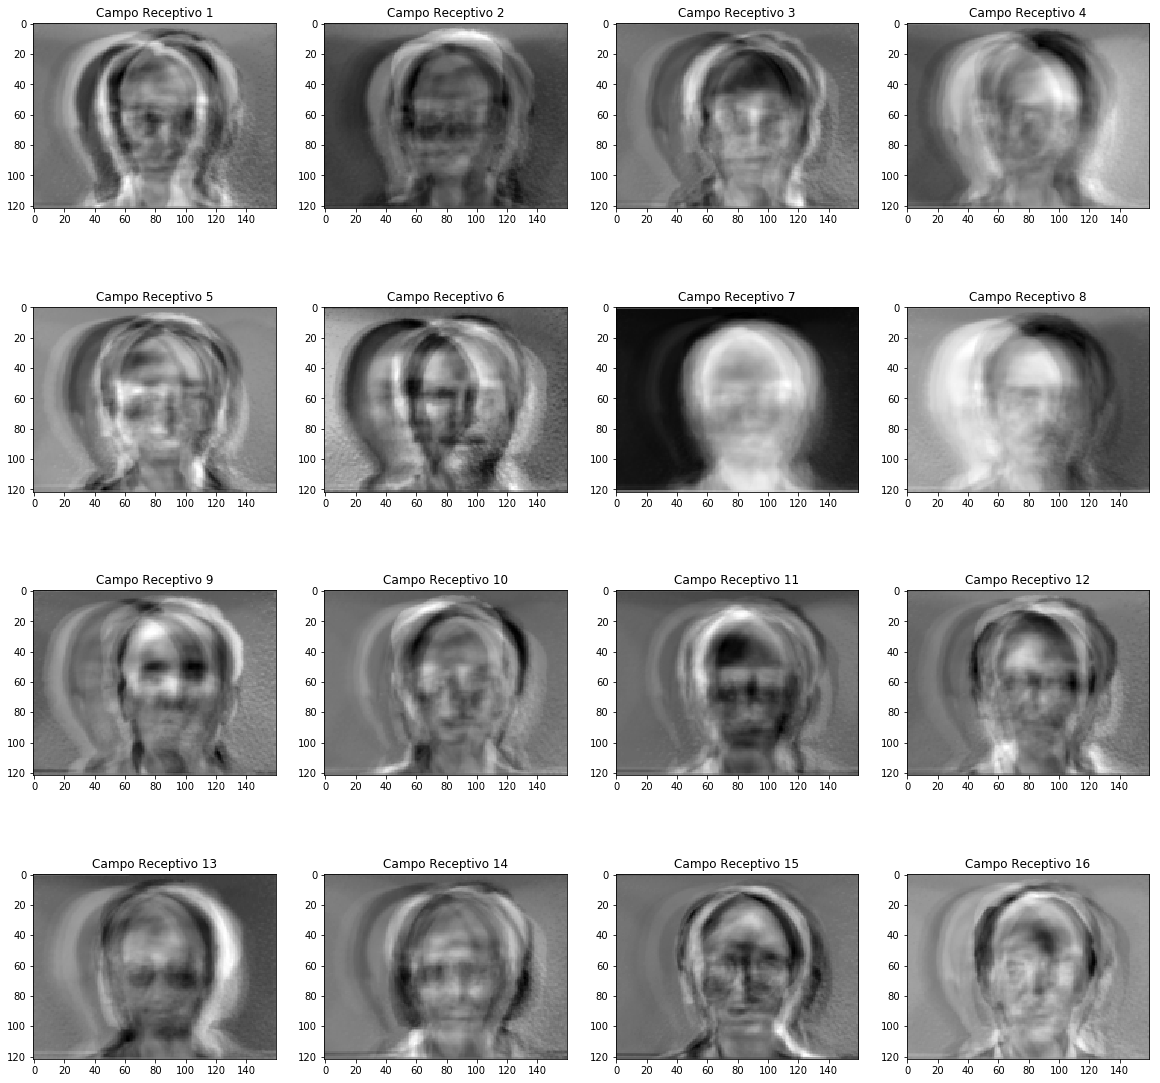

In [12]:
path = './yalefaces/subject13.surprised.png'
In   = scipy.misc.imread(path)
[a,b] = np.shape(In)

C1 = np.resize(C1,(N,int(a),int(b)))
fig=plt.figure();
plt.rcParams['figure.figsize'] = (20, 12); 
for i in range(N):
    fig.add_subplot(4,4,(i+1)); plt.imshow(C1[i,:,:],cmap='gray'); plt.title('Campo Receptivo {0}'.format(i+1));

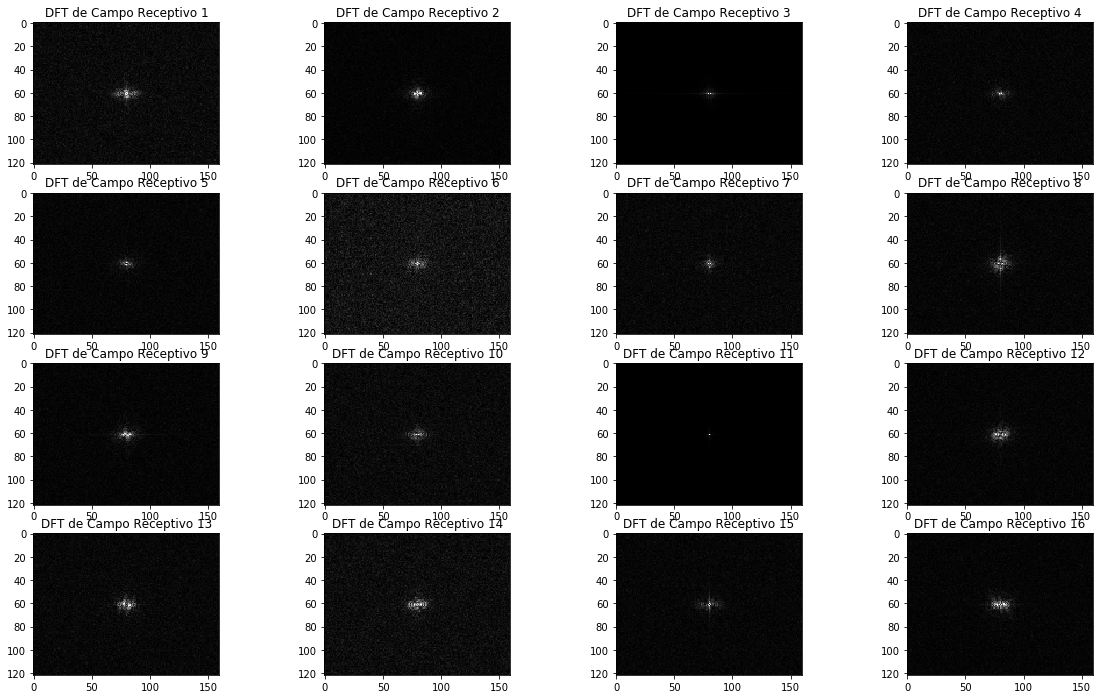

In [9]:
C1_DFT = np.abs(np.fft.fft2(C1))
fig=plt.figure()
plt.rcParams['figure.figsize'] = (20, 20); 
for i in range(N):
    fig.add_subplot(4,4,(i+1)); plt.imshow(np.fft.fftshift(C1_DFT[i,:,:]),cmap='gray'); 
    plt.title('DFT de Campo Receptivo {0}'.format(i+1));

In [129]:
def yalesfaces(images,a,b):
    
    Data = np.zeros([a,b,165])
    i = 0
    for image in images:
        x  = np.array(scipy.misc.imread(image)).astype(float)
        Data[:,:,i] = x
        i += 1
    yalesfaces ={'Data':Data}
    io.savemat('yalesfaces.mat',yalesfaces)
    
    return 0